# Choosing min_df

In this notebook we will, systematically, go about choosing min_df

## Imports

In [2]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, log_loss
from sklearn import svm #support vector machines
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from functions import *

C:\Users\Mikael\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Features plot

Below we show a plot of how the number of features change, as we exclude ingredients that only appear in i recipies

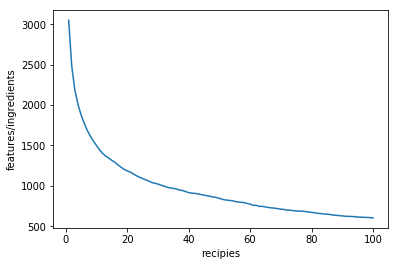

In [3]:
# First we make a list of dfs. 
# The are 39774 in total, so min_df = i/39774 means 
# include every ingredient that appears in at least i recipies.
df_list = [i/39774 for i in range(1,101)] 
feat_num = []

data = pd.read_json('train.json') 
recipie_list_list = data.ingredients.values.tolist()
recipie_string_list = [" ".join(ing) for ing in recipie_list_list]
del data, recipie_list_list

for df in df_list :
    vectorizer = CountVectorizer(min_df = df)
    X = vectorizer.fit_transform(recipie_string_list)
    feat_num.append(len(vectorizer.get_feature_names()))

del recipie_string_list
    
plt.plot(range(1,101), feat_num, "-")
plt.xlabel('recipies')
plt.ylabel('features/ingredients')
plt.show()


## Picking min_df using cross validation

Now we make a plot of how the accuracy of three classifications methods change, as a a function of how many reciepies an ingredient must appear in to be considered a feature

In [5]:
svm_list, log_list, forrest_list = accuracy_with_min_df(min_df_list = df_list, svm_parms = [0.1, 1, 10], log_parms = [0.1, 1, 10], forrest_trees = [10,20,30], forrest_depth = [10,20], folds = 3)

Testing min_df = 0.000025
Now doing svm cross validation
Now doing logistic cross validation
Now doing forrest cross validation

Testing min_df = 0.000050
Now doing svm cross validation
Now doing logistic cross validation
Now doing forrest cross validation

Testing min_df = 0.000075
Now doing svm cross validation
Now doing logistic cross validation
Now doing forrest cross validation

Testing min_df = 0.000101
Now doing svm cross validation
Now doing logistic cross validation
Now doing forrest cross validation

Testing min_df = 0.000126
Now doing svm cross validation
Now doing logistic cross validation
Now doing forrest cross validation

Testing min_df = 0.000151
Now doing svm cross validation
Now doing logistic cross validation
Now doing forrest cross validation

Testing min_df = 0.000176
Now doing svm cross validation
Now doing logistic cross validation
Now doing forrest cross validation

Testing min_df = 0.000201
Now doing svm cross validation
Now doing logistic cross validation
Now 

Now doing forrest cross validation

Testing min_df = 0.001634
Now doing svm cross validation
Now doing logistic cross validation
Now doing forrest cross validation

Testing min_df = 0.001659
Now doing svm cross validation
Now doing logistic cross validation
Now doing forrest cross validation

Testing min_df = 0.001685
Now doing svm cross validation
Now doing logistic cross validation
Now doing forrest cross validation

Testing min_df = 0.001710
Now doing svm cross validation
Now doing logistic cross validation
Now doing forrest cross validation

Testing min_df = 0.001735
Now doing svm cross validation
Now doing logistic cross validation
Now doing forrest cross validation

Testing min_df = 0.001760
Now doing svm cross validation
Now doing logistic cross validation
Now doing forrest cross validation

Testing min_df = 0.001785
Now doing svm cross validation
Now doing logistic cross validation
Now doing forrest cross validation

Testing min_df = 0.001810
Now doing svm cross validation
Now 

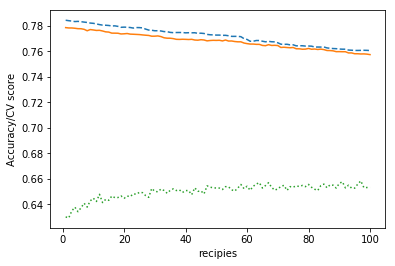

In [6]:
# Create plots 
plt.plot(range(1,101), svm_list, '--', label='SVM')
plt.plot(range(1,101), log_list, '-', label='Logistic')
plt.plot(range(1,101), forrest_list, ':', label='Random forrest')
plt.xlabel('recipies')
plt.ylabel('Accuracy/CV score')
plt.show()